In [6]:
import numpy as np
import pandas as pd
import sys
import gc
import joblib
import pathlib
import json
import glob
from tqdm.notebook import tqdm

# visualize
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter
sns.set_context("talk")
style.use('seaborn-colorblind')

import plotly.graph_objects as go

In [7]:
df = pd.read_csv("/Users/sandeep/Workspace/APEX/CRSR/CRSR.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-23,15.120000,16.75,14.090000,14.250000,14.250000,12759300
1,2020-09-24,14.180000,15.64,14.105000,15.580000,15.580000,2554900
2,2020-09-25,15.830000,18.33,15.766000,17.250000,17.250000,4579800
3,2020-09-28,17.450001,18.60,17.450001,18.469999,18.469999,1289900
4,2020-09-29,18.879999,20.09,18.600000,18.780001,18.780001,2071000


In [8]:
# Add day of the week so we can start to see weekly patterns
df['dayofweek'] = pd.to_datetime(df['Date']).dt.dayofweek
df['dayofweek'].value_counts()

2    71
1    70
3    69
4    66
0    64
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='dayofweek', ylabel='intraday'>

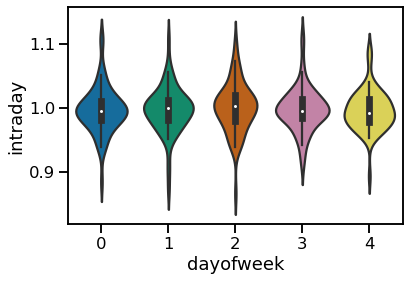

In [9]:
df['intraday'] = df['Close'] / df['Open']
sns.violinplot(x='dayofweek', y='intraday', data=df)

In [10]:
import plotly.express as px
# plotting violins to see the spread of intraday changes on each day
fig = px.violin(df, y="intraday", x='dayofweek')
fig.show()

In [11]:
# plotting violins to see the spread of intraday changes on each day with a different library
fig = go.Figure(data=go.Violin(y=df['intraday'], x=df['dayofweek'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               ))
fig.show()
                            

In [12]:
def backtest(df, day=1):
    """
    Every time buy LOVE with 1000 USD
    """
    
    usd = 1000
    profits = []
    for i in range(len(df)):
        if df['dayofweek'].values[i] == day:
            # buy
            pos_volume = usd / df['Open'].values[i]
            profits.append(pos_volume * (df['Close'].values[i] - df['Open'].values[i]))
    return profits

def plot_profits(profits, day):
    plt.figure()
    profits = np.array(profits)
    plt.plot(np.cumsum(profits))
    winp = np.sum(profits > 0) / len(profits)
    plt.xlabel('week')
    plt.ylabel('profits (USD)')
    plt.title(f'P(win) = {winp:.3f} on day {day}')

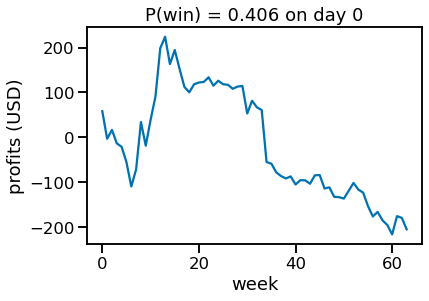

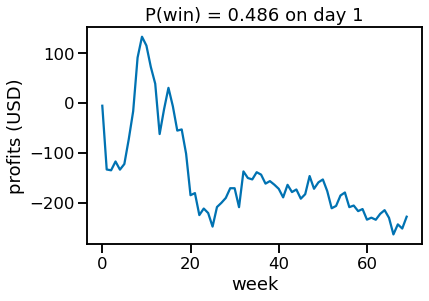

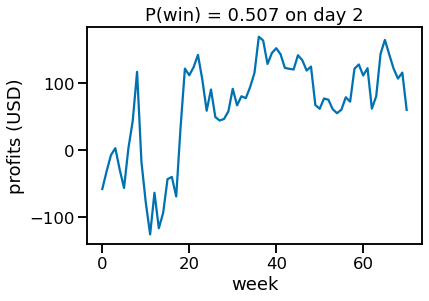

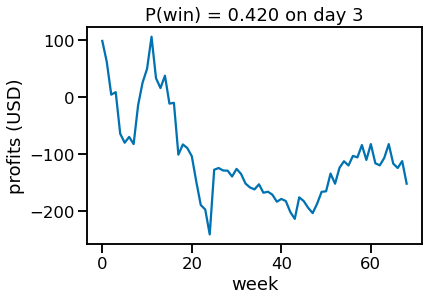

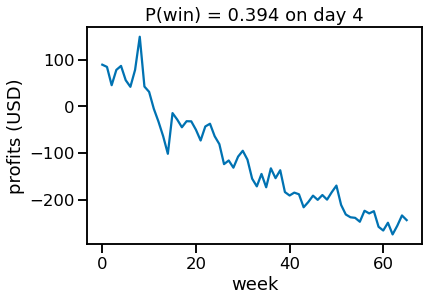

In [13]:
for i in range(0,5):
    profits = backtest(df, day=i)
    plot_profits(profits, day = i)